In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train = pd.read_csv('../Train/train_set_geo_level_sum_base_area_per_height.csv')

train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,geo_level_1_id_sum,geo_level_2_id_sum,geo_level_3_id_sum,base_percentage,area_per_height,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,1,24381,270,37,1.200000,30,3
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,1,19080,199,16,1.142857,56,2
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,1,14889,1760,136,1.000000,25,3
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,1,6252,205,31,1.200000,30,2
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,1,8220,1038,122,0.888889,72,3


In [4]:
X, y = train.iloc[:,:-1], train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [6]:
params = {
    'n_estimators': [50, 70, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [15],
    'random_state': [123],
    'class_weight': ["balanced"]
}

In [7]:
opt = RandomizedSearchCV(RandomForestClassifier(), params, cv=10, n_iter=96)
opt.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=96,
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [15],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [50, 70, 100, 150],
                                        'random_state': [123]})

In [8]:
opt.best_estimator_

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       min_samples_leaf=15, min_samples_split=5,
                       n_estimators=150, random_state=123)

In [10]:
preds = opt.predict(X_test)
f1 = f1_score(y_test, preds, average='micro')
print("F1 Score", f1)

F1 Score 0.681938528836192


In [12]:
rf_model = RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       min_samples_leaf=15, min_samples_split=5,
                       n_estimators=150, random_state=123)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = f1_score(y_test, preds, average='micro')
print("F1 Score", f1)

F1 Score 0.681938528836192


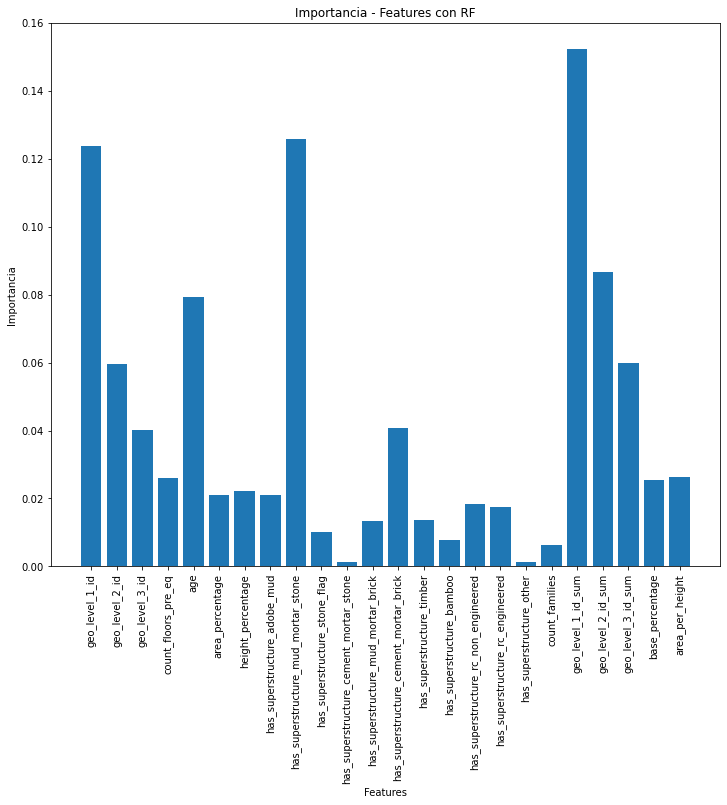

In [13]:
plt.figure(figsize=(12, 10))
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()